In [1]:
# import system modules
import sys
import os
import gc

# import standard numerical modules
import numpy as np
import math

import matplotlib.pyplot as plt

# import machine learning modules
import tensorflow as tf
import keras.backend as K

sys.path.append('../20240503')
import DCTR


2024-07-02 11:27:41.307996: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-02 11:27:41.308038: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Process Data

In [70]:
data_dir = '../../Data'
num_events = 100000


In [71]:
# and n-jettiness datasets created with python scripts on NAF
X0_showered = np.load(f'{data_dir}/POWHEG_hvq/all_decays/converted_lhe_hvq_all_decays_1.npy')[:num_events]

# nrm data and save to disk (only needed to run once)
'''
nrm_array_dir = '/home/finn/gdrive/_STUDIUM_/DCTR_Paper/git/DCTR_FP/Data/POWHEG_hvq/showered/'
nrm_array = np.load(f'{nrm_array_dir}/norm_array_lhe_01.npy')
X0_nrm, _ = DCTR.normalize_data(X0_showered.copy(), nrm_array)
np.save(f'{data_dir}/POWHEG_hvq/all_decays/normed_lhe_hvq_all_decays_1.npy', X0_nrm)
'''
X0_nrm = np.array(np.load(f'{data_dir}/POWHEG_hvq/all_decays/normed_lhe_hvq_all_decays_1.npy')[:num_events])

X0_nJets = np.array(np.load(f'{data_dir}/POWHEG_hvq/all_decays/jet_multiplicity_hvq_all_decays_1.npy')[:num_events])
X0_wgt = X0_nJets[:,1]

X0_jet = np.array(np.load(f'{data_dir}/POWHEG_hvq/all_decays/jet_4vectors_hvq_all_decays_1.npy'))


print(f'{np.shape(X0_showered)  = }')
print(f'{np.shape(X0_nrm)       = }')
print(f'{np.shape(X0_nJets)     = }')
print(f'{np.shape(X0_wgt)       = }')
print(f'{np.shape(X0_jet)       = }')


np.shape(X0_showered)  = (100000, 3, 9)
np.shape(X0_nrm)       = (100000, 3, 9)
np.shape(X0_nJets)     = (100000, 2)
np.shape(X0_wgt)       = (100000,)
np.shape(X0_jet)       = (100000, 20, 6)


In [72]:
# and n-jettiness datasets created with python scripts on NAF
X0_filtered_showered = np.load(f'{data_dir}/POWHEG_hvq/all_decays_filtered/converted_lhe_hvq_all_decays_filtered.npy')[:num_events]

# nrm data and save to disk (only needed to run once)
'''
nrm_array_dir = '/home/finn/gdrive/_STUDIUM_/DCTR_Paper/git/DCTR_FP/Data/POWHEG_hvq/showered/'
nrm_array = np.load(f'{nrm_array_dir}/norm_array_lhe_01.npy')
X0_filtered_nrm, _ = DCTR.normalize_data(X0_showered.copy(), nrm_array)
np.save(f'{data_dir}/POWHEG_hvq/all_decays_filtered/normed_lhe_hvq_all_decays_filtered.npy', X0_nrm)
'''
X0_filtered_nrm = np.array(np.load(f'{data_dir}/POWHEG_hvq/all_decays_filtered/normed_lhe_hvq_all_decays_filtered.npy')[:num_events])

X0_filtered_nJets = np.array(np.load(f'{data_dir}/POWHEG_hvq/all_decays_filtered/jet_multiplicity_hvq_all_decays_filtered.npy')[:num_events])
X0_filtered_wgt = X0_filtered_nJets[:,1]

X0_filtered_jet = np.array(np.load(f'{data_dir}/POWHEG_hvq/all_decays_filtered/jet_4vectors_hvq_all_decays_filtered.npy'))


print(f'{np.shape(X0_filtered_showered)  = }')
print(f'{np.shape(X0_filtered_nrm)       = }')
print(f'{np.shape(X0_filtered_nJets)     = }')
print(f'{np.shape(X0_filtered_wgt)       = }')
print(f'{np.shape(X0_filtered_jet)       = }')



np.shape(X0_filtered_showered)  = (100000, 3, 9)
np.shape(X0_filtered_nrm)       = (100000, 3, 9)
np.shape(X0_filtered_nJets)     = (100000, 2)
np.shape(X0_filtered_wgt)       = (100000,)
np.shape(X0_filtered_jet)       = (100000, 20, 6)


In [73]:
# and n-jettiness datasets created with python scripts on NAF
X0_dileptonic_showered = np.load(f'{data_dir}/POWHEG_hvq/dileptonic/converted_lhe_hvq_dileptonic.npy')[:num_events]

# nrm data and save to disk (only needed to run once)
'''
nrm_array_dir = '/home/finn/gdrive/_STUDIUM_/DCTR_Paper/git/DCTR_FP/Data/POWHEG_hvq/showered/'
nrm_array = np.load(f'{nrm_array_dir}/norm_array_lhe_01.npy')
X0_dileptonic_nrm, _ = DCTR.normalize_data(X0_showered.copy(), nrm_array)
np.save(f'{data_dir}/POWHEG_hvq/dileptonic/normed_lhe_hvq_dileptonic.npy', X0_nrm)
'''
X0_dileptonic_nrm = np.array(np.load(f'{data_dir}/POWHEG_hvq/dileptonic/normed_lhe_hvq_dileptonic.npy')[:num_events])

X0_dileptonic_nJets = np.array(np.load(f'{data_dir}/POWHEG_hvq/dileptonic/jet_multiplicity_hvq_dileptonic.npy')[:num_events])
X0_dileptonic_wgt = X0_dileptonic_nJets[:,1]

X0_dileptonic_jet = np.array(np.load(f'{data_dir}/POWHEG_hvq/dileptonic/jet_4vectors_hvq_dileptonic.npy'))


print(f'{np.shape(X0_dileptonic_showered)  = }')
print(f'{np.shape(X0_dileptonic_nrm)       = }')
print(f'{np.shape(X0_dileptonic_nJets)     = }')
print(f'{np.shape(X0_dileptonic_wgt)       = }')
print(f'{np.shape(X0_dileptonic_jet)       = }')



np.shape(X0_dileptonic_showered)  = (100000, 3, 9)
np.shape(X0_dileptonic_nrm)       = (100000, 3, 9)
np.shape(X0_dileptonic_nJets)     = (100000, 2)
np.shape(X0_dileptonic_wgt)       = (100000,)
np.shape(X0_dileptonic_jet)       = (100000, 20, 6)


In [74]:
# MiNNLO | only 10k events per lhe

X1_showered = []
X1_nJets = []
X1_jet = []

for i in range(11):
    if i == 4: # probably broken, sinze size is smaller than other datasets | 0.6MB vs 2.2MB
        continue
    X1_showered.extend(np.load(f'{data_dir}/MiNNLO/showered/converted_lhe_MiNNLO_{990 + i:04d}.npy'))
    X1_nJets.extend(np.load(f'{data_dir}/MiNNLO/showered/jet_multiplicity_MiNNLO_{990 + i:04d}.npy'))
    X1_jet.extend(np.load(f'{data_dir}/MiNNLO/showered/jet_4vectors_MiNNLO_{990 + i:04d}.npy'))

X1_showered = np.array(X1_showered[:num_events])
X1_nJets = np.array(X1_nJets[:num_events])
X1_jet = np.array(X1_jet[:num_events])

X1_wgt = X1_nJets[:, 1]


print(f'{np.shape(X1_showered)  = }')
print(f'{np.shape(X1_nJets)     = }')
print(f'{np.shape(X1_wgt)       = }')
print(f'{np.shape(X1_jet)       = }')


np.shape(X1_showered)  = (100000, 3, 9)
np.shape(X1_nJets)     = (100000, 2)
np.shape(X1_wgt)       = (100000,)
np.shape(X1_jet)       = (100000, 20, 6)


In [75]:
print(f'{(X0_nJets[:5]) = }')
print(f'{min(X0_nJets[:,0]), max(X0_nJets[:,0]) = }')

print(f'{(X1_nJets[:5]) = }')
print(f'{min(X1_nJets[:,0]), max(X1_nJets[:,0]) = }')


(X0_nJets[:5]) = array([[  3.   , 692.328],
       [  4.   , 692.328],
       [  3.   , 692.328],
       [  6.   , 692.328],
       [  5.   , 692.328]])
min(X0_nJets[:,0]), max(X0_nJets[:,0]) = (0.0, 14.0)
(X1_nJets[:5]) = array([[   3.   ,  103.245],
       [   3.   ,  103.245],
       [   3.   , -103.245],
       [   2.   ,  103.245],
       [   2.   ,  103.245]])
min(X1_nJets[:,0]), max(X1_nJets[:,0]) = (0.0, 12.0)


In [76]:
# delete energy from (normalized) testing dataset, since the neural network was trained without these parameters
X0_nrm = np.delete(X0_nrm, 5, -1) # E
X0_nrm = np.delete(X0_nrm, 4, -1) # eta

# garbage collection after deleting to clear memory asap
print(gc.collect())

print(X0_nrm.shape)
print(X0_nrm[0])


330
(100000, 3, 7)
[[-0.51072356  1.0374852   0.20349026 -0.39750507  0.          1.
   0.        ]
 [ 0.29871105  0.56625112 -0.32016439  0.0996068   0.6         1.
   0.        ]
 [ 0.15814903  1.22186919  1.31751811  0.03588618 -0.6         1.
   0.        ]]


In [77]:
# delete energy from (normalized) testing dataset, since the neural network was trained without these parameters
X0_dileptonic_nrm = np.delete(X0_dileptonic_nrm, 5, -1) # E
X0_dileptonic_nrm = np.delete(X0_dileptonic_nrm, 4, -1) # eta

# garbage collection after deleting to clear memory asap
print(gc.collect())


print(X0_dileptonic_nrm.shape)
print(X0_dileptonic_nrm[0])


0
(100000, 3, 7)
[[-0.51072356  1.0374852   0.20349026 -0.39750507  0.          1.
   0.        ]
 [ 0.29871105  0.56625112 -0.32016439  0.0996068   0.6         1.
   0.        ]
 [ 0.15814903  1.22186919  1.31751811  0.03588618 -0.6         1.
   0.        ]]


In [78]:
# delete energy from (normalized) testing dataset, since the neural network was trained without these parameters
X0_filtered_nrm = np.delete(X0_filtered_nrm, 5, -1) # E
X0_filtered_nrm = np.delete(X0_filtered_nrm, 4, -1) # eta

# garbage collection after deleting to clear memory asap
print(gc.collect())

print(X0_filtered_nrm.shape)
print(X0_filtered_nrm[0])


0
(100000, 3, 7)
[[-0.51072356  1.0374852   0.20349026 -0.39750507  0.          1.
   0.        ]
 [ 0.29871105  0.56625112 -0.32016439  0.0996068   0.6         1.
   0.        ]
 [ 0.15814903  1.22186919  1.31751811  0.03588618 -0.6         1.
   0.        ]]


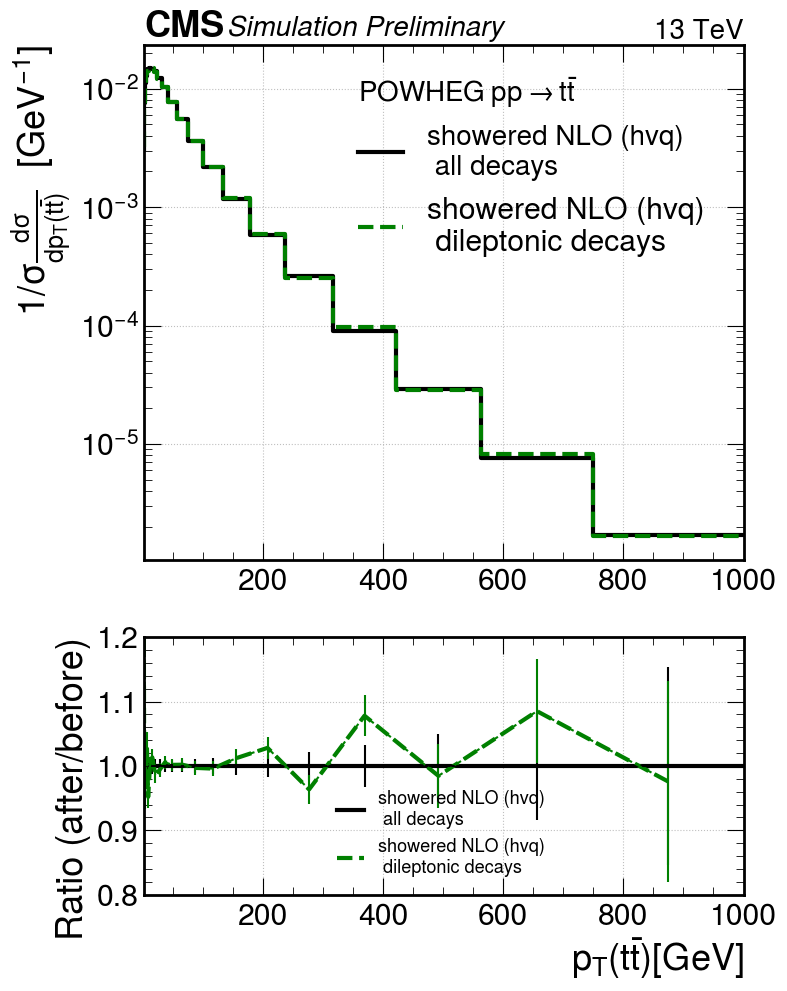

/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1781: RuntimeWarning: invalid value encountered in divide
  ratio_0 = hist0 / hist0
/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1782: RuntimeWarning: invalid value encountered in divide
  ratio_1 = hist1 / hist0


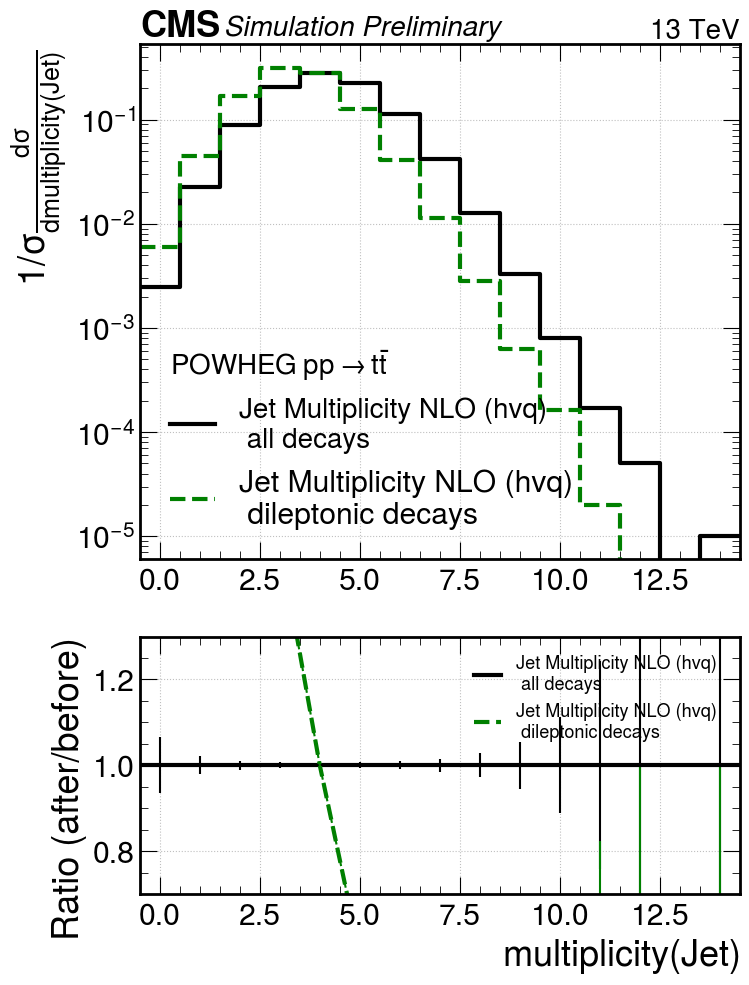

In [55]:
# compare dileptonic to all decay hvq

args = [(X0_showered, X0_wgt, 'showered NLO (hvq) \n all decays'),
        (X0_dileptonic_showered, X0_dileptonic_wgt, 'showered NLO (hvq) \n dileptonic decays')]

log_bins = np.logspace(np.log10(1), np.log10(1000), 25)


DCTR.plot_ratio_cms_2(args, bins = log_bins, y_scale = 'log', ratio_ylim=[0.8, 1.2]) #, part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')



args_multiplicity = [(X0_nJets[:,0], X0_wgt, 'Jet Multiplicity NLO (hvq) \n all decays'),
                     (X0_dileptonic_nJets[:,0], X0_dileptonic_wgt, 'Jet Multiplicity NLO (hvq) \n dileptonic decays')]

bins = np.linspace(-0.5, 14.5, 16)

DCTR.plot_ratio_cms_2(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3], part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')


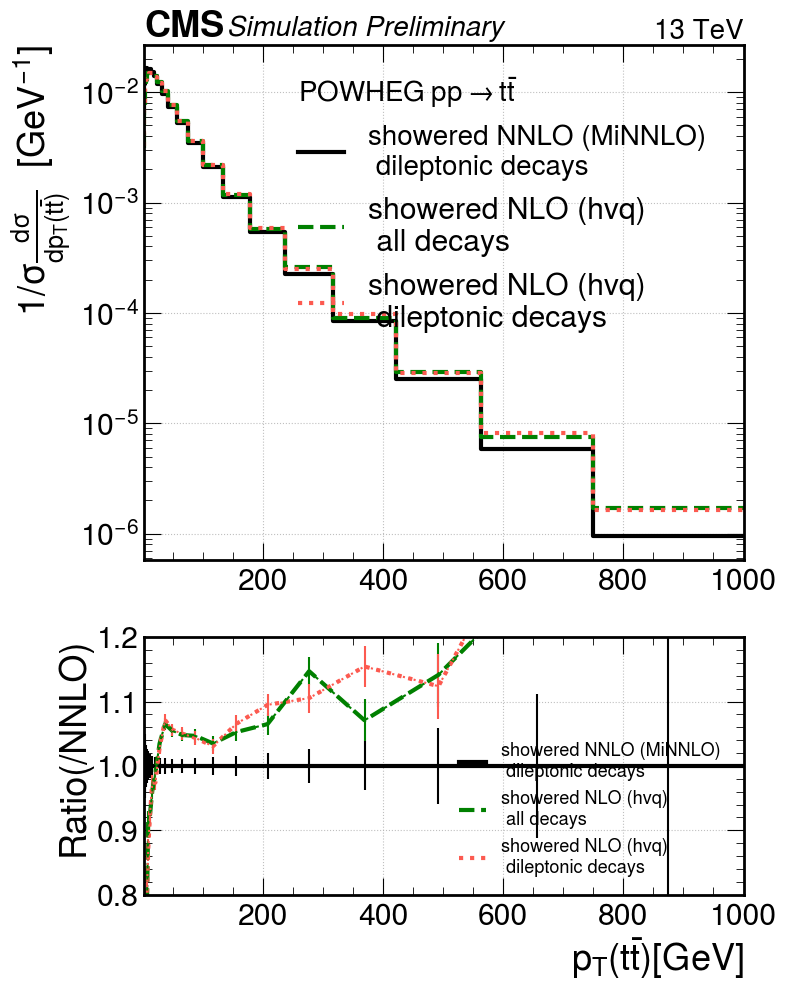

/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1393: RuntimeWarning: invalid value encountered in divide
  ratio_0 = hist0 / hist0
/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1394: RuntimeWarning: divide by zero encountered in divide
  ratio_1 = hist1 / hist0
/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1394: RuntimeWarning: invalid value encountered in divide
  ratio_1 = hist1 / hist0
/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1395: RuntimeWarning: invalid value encountered in divide
  ratio_2 = hist2 / hist0


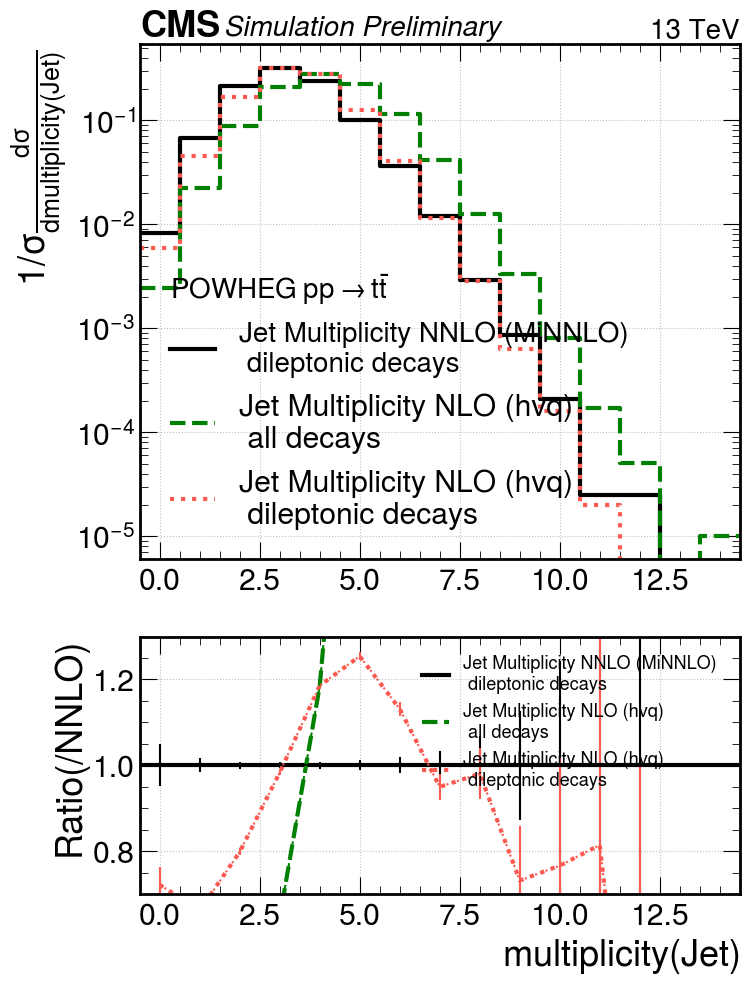

In [83]:
# compare hvq to MiNNLO

args = [(X1_showered, X1_wgt, 'showered NNLO (MiNNLO) \n dileptonic decays'),
        (X0_showered, X0_wgt, 'showered NLO (hvq) \n all decays'),
        (X0_dileptonic_showered, X0_dileptonic_wgt, 'showered NLO (hvq) \n dileptonic decays')]

log_bins = np.logspace(np.log10(1), np.log10(1000), 25)


DCTR.plot_ratio_cms(args, bins = log_bins, y_scale = 'log', ratio_ylim=[0.8, 1.2]) #, part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')




args_multiplicity = [(X1_nJets[:,0], X1_wgt, 'Jet Multiplicity NNLO (MiNNLO) \n dileptonic decays'),
                     (X0_nJets[:,0], X0_wgt, 'Jet Multiplicity NLO (hvq) \n all decays'),
                     (X0_dileptonic_nJets[:,0], X0_dileptonic_wgt, 'Jet Multiplicity NLO (hvq) \n dileptonic decays')]

bins = np.linspace(-0.5, 14.5, 16)


DCTR.plot_ratio_cms(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3], part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')


# all decays hvq


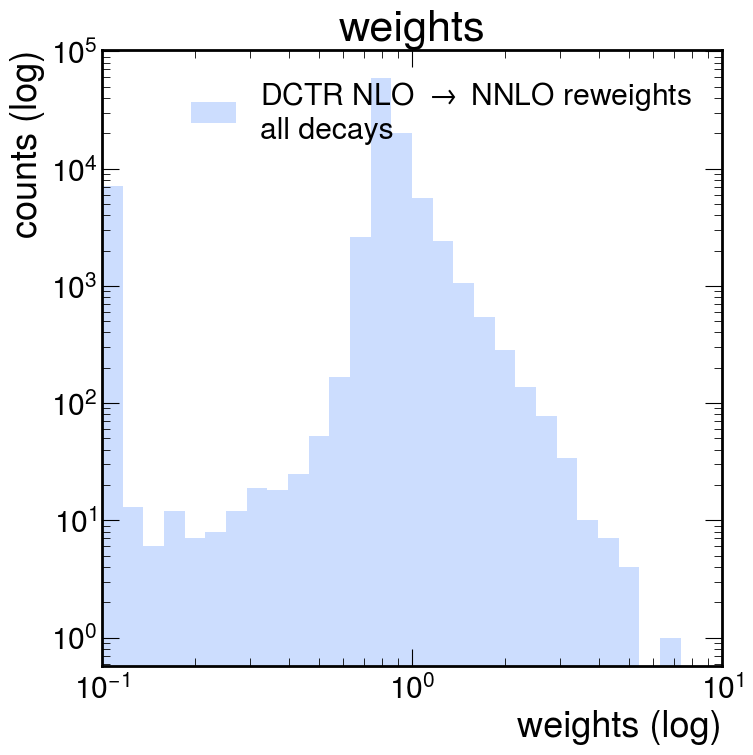

In [79]:
# calculate weights from DCTR trained on showered events
model = '../20240521_showered_new/train_20240523_regular_epochs.tf' # path to previously trained model (in .tf format (folder)) for showered events

# calculate rwgt
with tf.device('CPU'):
    dctr_rwgt = DCTR.get_rwgt([model], X0_nrm) # .tf models also include network architecture. get_rwgt() sets up the network for the (list of) models, then calls predict_weights() like in DCTR_notebook_OLD_14-to-13TeV notebook


wgts_plot = [(dctr_rwgt[0], r'DCTR NLO $\to$ NNLO reweights' + '\nall decays')]

DCTR.plot_weights(wgts_plot, start = 0.1, stop = 10)

# apply orginal generator weights to rwgt
rwgt = np.multiply(dctr_rwgt[0], X0_wgt)


/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1393: RuntimeWarning: invalid value encountered in divide
  ratio_0 = hist0 / hist0
/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1394: RuntimeWarning: divide by zero encountered in divide
  ratio_1 = hist1 / hist0
/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1394: RuntimeWarning: invalid value encountered in divide
  ratio_1 = hist1 / hist0
/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1395: RuntimeWarning: divide by zero encountered in divide
  ratio_2 = hist2 / hist0
/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1395: RuntimeWarning: invalid value encountered in divide
  ratio_2 = hist2 / hist0


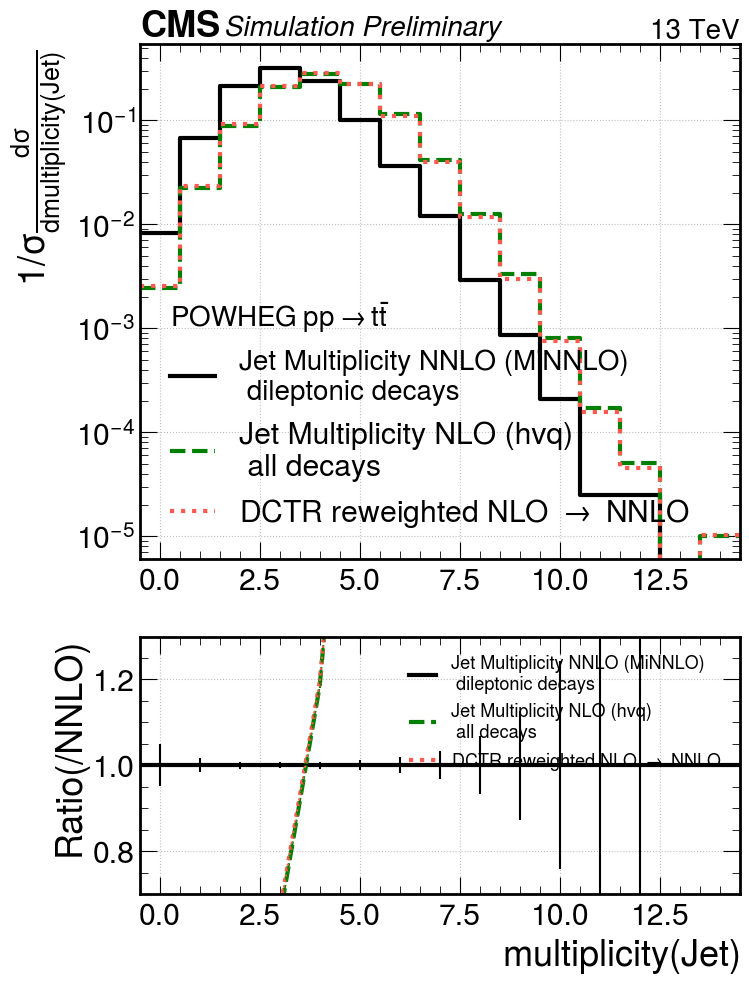

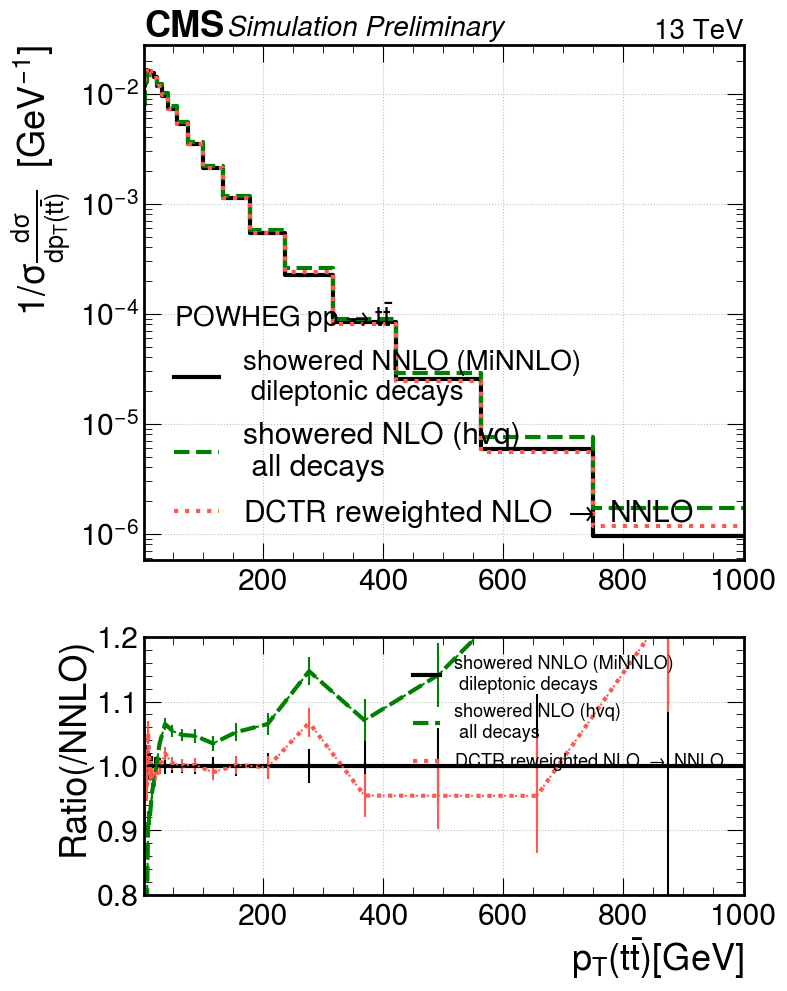

In [60]:
args_multiplicity = [(X1_nJets[:,0], X1_wgt, 'Jet Multiplicity NNLO (MiNNLO) \n dileptonic decays'),
                     (X0_nJets[:,0], X0_wgt, 'Jet Multiplicity NLO (hvq) \n all decays'),
                     (X0_nJets[:,0], rwgt,  r'DCTR reweighted NLO $\to$ NNLO')]

bins = np.linspace(-0.5, 14.5, 16)


DCTR.plot_ratio_cms(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3], part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')


# check pt to see if reweighting works on a standard observable
args = [(X1_showered, X1_wgt, 'showered NNLO (MiNNLO) \n dileptonic decays'),
        (X0_showered, X0_wgt, 'showered NLO (hvq) \n all decays'),
        (X0_showered, rwgt,  r'DCTR reweighted NLO $\to$ NNLO')]

log_bins = np.logspace(np.log10(1), np.log10(1000), 25)


DCTR.plot_ratio_cms(args, bins = log_bins, y_scale = 'log', ratio_ylim=[0.8, 1.2])



# dileptonic hvq

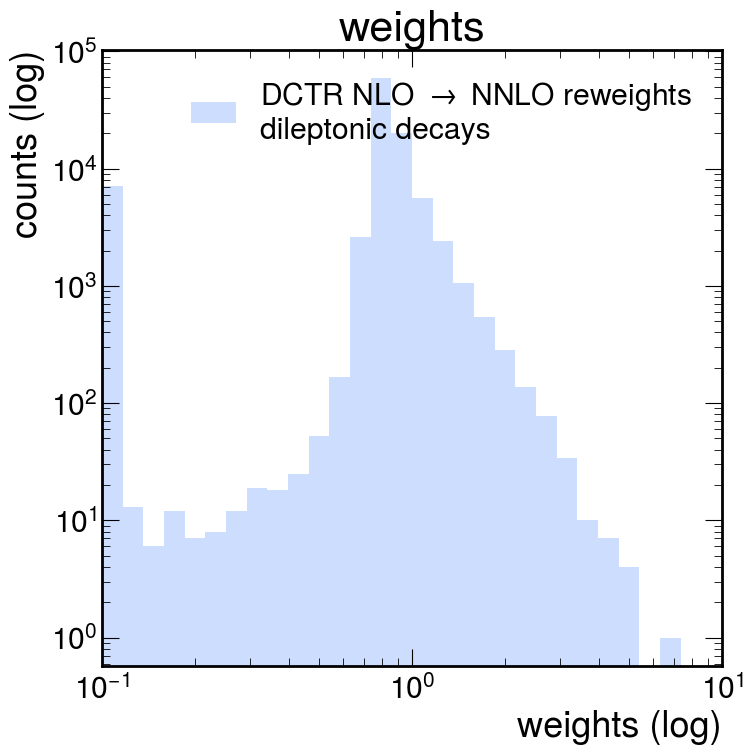

In [80]:
# calculate weights from DCTR trained on showered events
model = '../20240521_showered_new/train_20240523_regular_epochs.tf' # path to previously trained model (in .tf format (folder)) for showered events

# calculate rwgt
with tf.device('CPU'):
    dctr_rwgt = DCTR.get_rwgt([model], X0_dileptonic_nrm) # .tf models also include network architecture. get_rwgt() sets up the network for the (list of) models, then calls predict_weights() like in DCTR_notebook_OLD_14-to-13TeV notebook


wgts_plot = [(dctr_rwgt[0], r'DCTR NLO $\to$ NNLO reweights' + '\ndileptonic decays')]

DCTR.plot_weights(wgts_plot, start = 0.1, stop = 10)

# apply orginal generator weights to rwgt
rwgt_dileptonic = np.multiply(dctr_rwgt[0], X0_dileptonic_wgt)



/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1393: RuntimeWarning: invalid value encountered in divide
  ratio_0 = hist0 / hist0
/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1394: RuntimeWarning: invalid value encountered in divide
  ratio_1 = hist1 / hist0
/home/finn/DCTR_Paper/DCTR_FP/20240702_jets_new/../20240503/DCTR.py:1395: RuntimeWarning: invalid value encountered in divide
  ratio_2 = hist2 / hist0


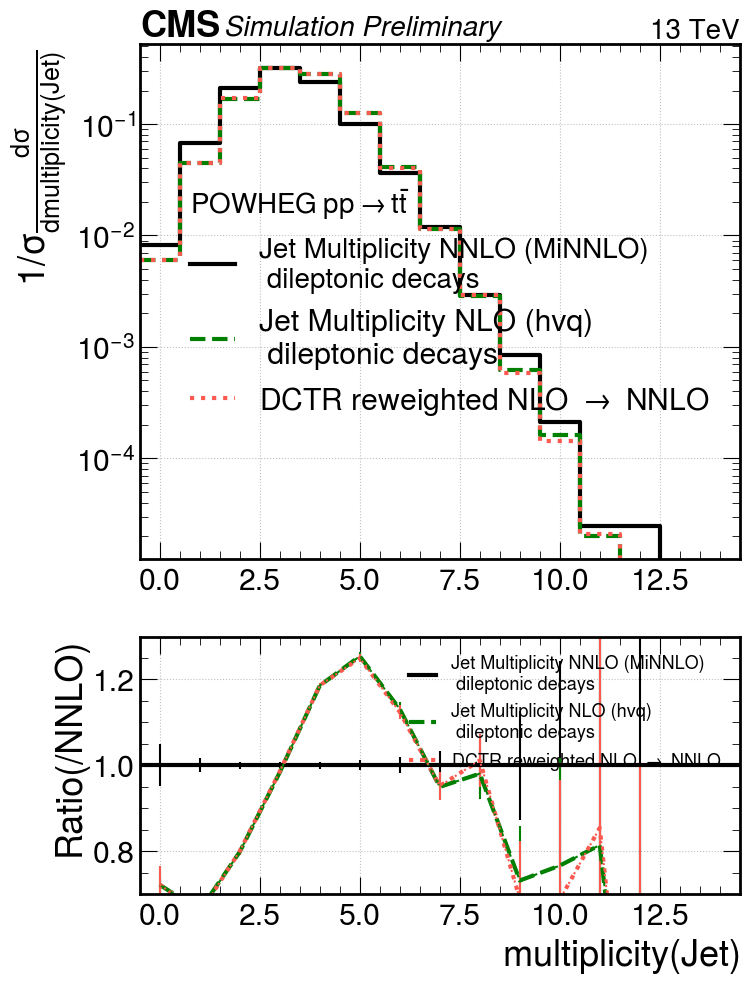

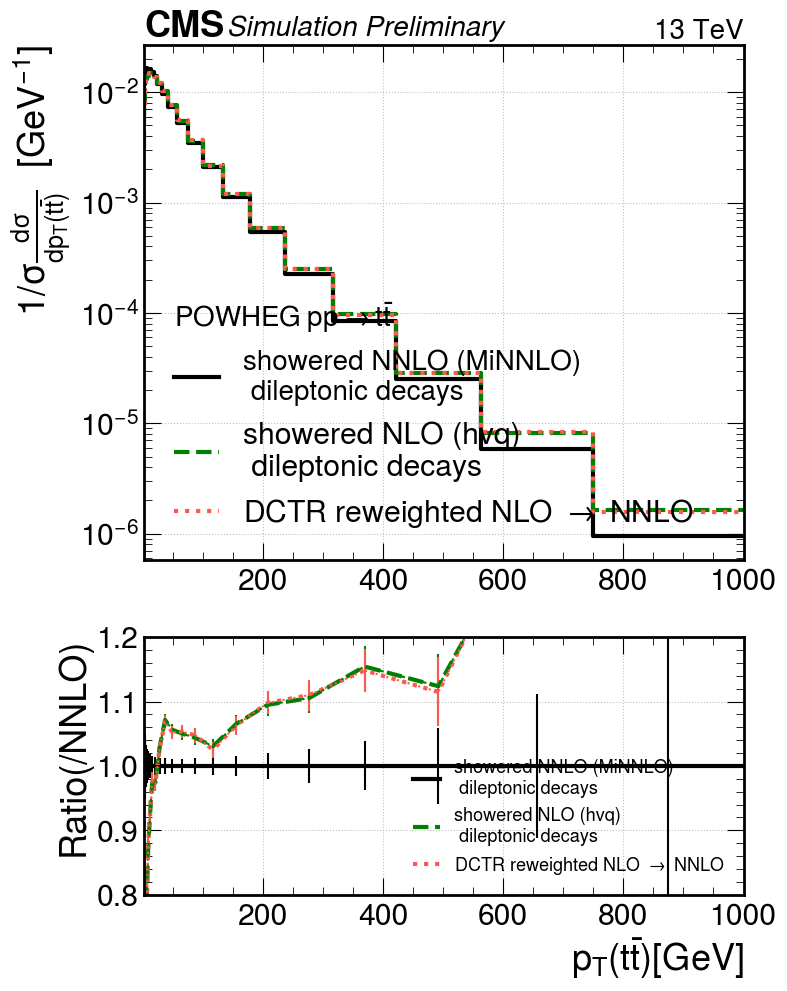

In [84]:
# jet multiplicity

args_multiplicity = [(X1_nJets[:,0], X1_wgt,            'Jet Multiplicity NNLO (MiNNLO) \n dileptonic decays'),
                     (X0_dileptonic_nJets[:,0], X0_dileptonic_wgt,            'Jet Multiplicity NLO (hvq) \n dileptonic decays'),
                     (X0_dileptonic_nJets[:,0], rwgt_dileptonic,  r'DCTR reweighted NLO $\to$ NNLO')]

bins = np.linspace(-0.5, 14.5, 16)

DCTR.plot_ratio_cms(args_multiplicity, bins = bins, y_scale = 'log', ratio_ylim=[0.7, 1.3], part_label='Jet', arg_label='multiplicity', unit='', inv_unit='')


# pt(tt)
args = [(X1_showered, X1_wgt, 'showered NNLO (MiNNLO) \n dileptonic decays'),
        (X0_dileptonic_showered, X0_dileptonic_wgt, 'showered NLO (hvq) \n dileptonic decays'),
        (X0_dileptonic_showered, rwgt_dileptonic,  r'DCTR reweighted NLO $\to$ NNLO')]

log_bins = np.logspace(np.log10(1), np.log10(1000), 25)


DCTR.plot_ratio_cms(args, bins = log_bins, y_scale = 'log', ratio_ylim=[0.8, 1.2])



# jet p_t

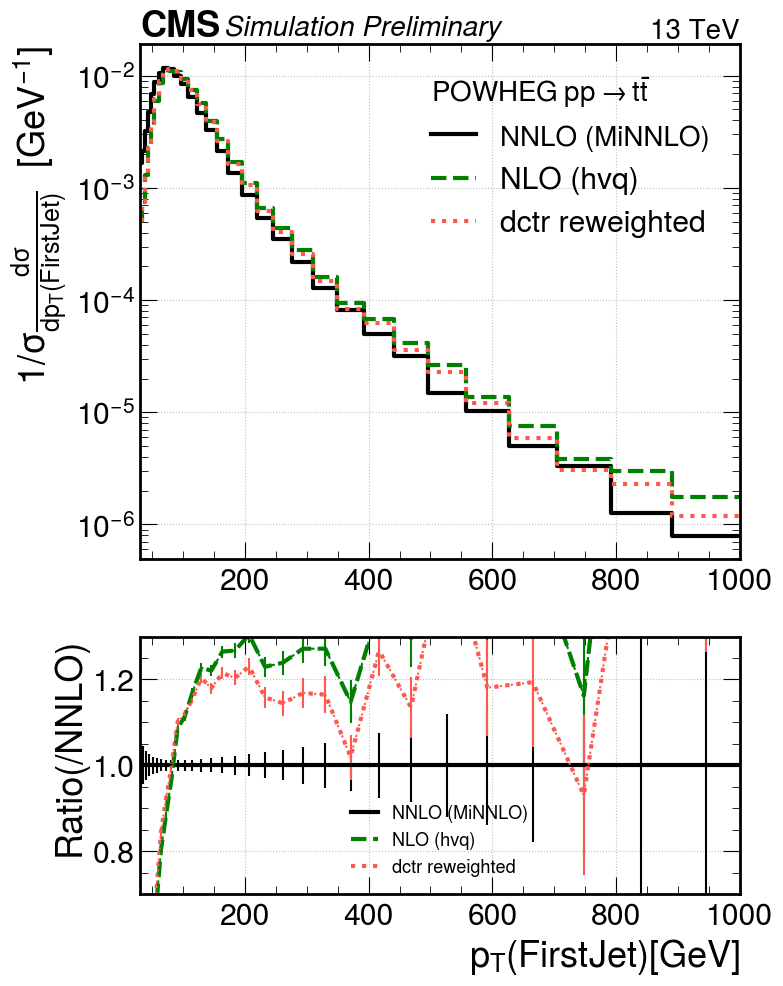

"\nargs_jet_1 = [(X1_jet[:, 1, 0], X1_wgt, 'NNLO (MiNNLO)'),\n              (X0_jet[:, 1, 0], X0_wgt, 'NLO (hvq)'),\n              (X0_jet[:, 1, 0], rwgt, 'dctr reweighted')]\n\nDCTR.plot_ratio_cms(args_jet_1, bins = log_bins, y_scale = 'log', part_label='2. Jet')\n\n\nargs_jet_2 = [(X1_jet[:, 2, 0], X1_wgt, 'NNLO (MiNNLO)'),\n              (X0_jet[:, 2, 0], X0_wgt, 'NLO (hvq)'),\n              (X0_jet[:, 2, 0], rwgt, 'dctr reweighted')]\n\nDCTR.plot_ratio_cms(args_jet_2, bins = log_bins, y_scale = 'log', part_label='3. Jet')\n\n\nargs_jet_3 = [(X1_jet[:, 3, 0], X1_wgt, 'NNLO (MiNNLO)'),\n              (X0_jet[:, 3, 0], X0_wgt, 'NLO (hvq)'),\n              (X0_jet[:, 3, 0], rwgt, 'dctr reweighted')]\n\nDCTR.plot_ratio_cms(args_jet_3, bins = log_bins, y_scale = 'log', part_label='4. Jet')\n"

In [ ]:
log_bins = np.logspace(np.log10(30), np.log10(1000), 31)

args_jet_0 = [(X1_jet[:, 0, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_jet[:, 0, 0], X0_wgt, 'NLO (hvq)'),
              (X0_jet[:, 0, 0], rwgt, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_0, bins = log_bins, y_scale = 'log', part_label='First Jet', ratio_ylim=(0.7, 1.3))

'''
args_jet_1 = [(X1_jet[:, 1, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_jet[:, 1, 0], X0_wgt, 'NLO (hvq)'),
              (X0_jet[:, 1, 0], rwgt, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_1, bins = log_bins, y_scale = 'log', part_label='2. Jet')


args_jet_2 = [(X1_jet[:, 2, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_jet[:, 2, 0], X0_wgt, 'NLO (hvq)'),
              (X0_jet[:, 2, 0], rwgt, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_2, bins = log_bins, y_scale = 'log', part_label='3. Jet')


args_jet_3 = [(X1_jet[:, 3, 0], X1_wgt, 'NNLO (MiNNLO)'),
              (X0_jet[:, 3, 0], X0_wgt, 'NLO (hvq)'),
              (X0_jet[:, 3, 0], rwgt, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_jet_3, bins = log_bins, y_scale = 'log', part_label='4. Jet')
'''


np.shape(X0_jet_pt_sums) = (100000,)
np.shape(X1_jet_pt_sums) = (100000,)


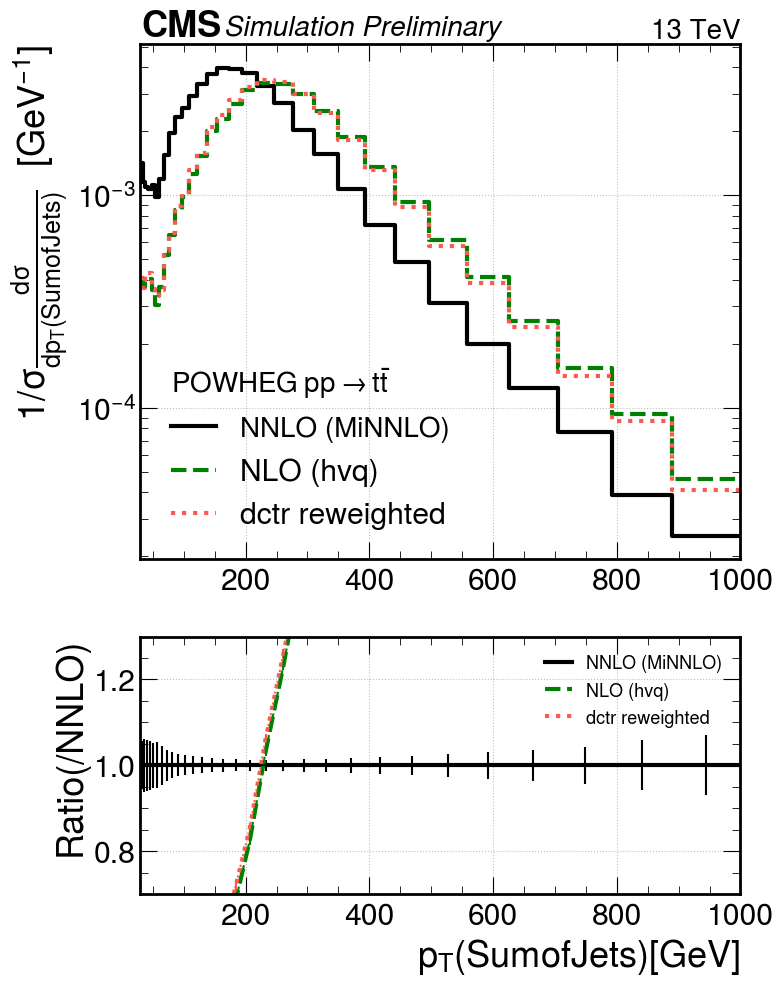

In [ ]:
# sum of jet pt per event

X0_jet_pt_sums = []
for event in X0_jet:
    X0_jet_pt_sums.append(np.sum(event[:,0]))

X1_jet_pt_sums = []
for event in X1_jet:
    X1_jet_pt_sums.append(np.sum(event[:,0]))

    
print(f'{np.shape(X0_jet_pt_sums) = }')
print(f'{np.shape(X1_jet_pt_sums) = }')

log_bins = np.logspace(np.log10(10), np.log10(1000), 31)

args_jet_sum = [(np.array(X1_jet_pt_sums), X1_wgt, 'NNLO (MiNNLO)'),
                (np.array(X0_jet_pt_sums), X0_wgt, 'NLO (hvq)'),
                (np.array(X0_jet_pt_sums), rwgt, 'dctr reweighted')]

log_bins = np.logspace(np.log10(30), np.log10(1000), 31)

DCTR.plot_ratio_cms(args_jet_sum, bins = log_bins, y_scale = 'log', part_label='Sum of Jets', ratio_ylim=(0.7, 1.3))


